In [1]:
import os
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [2]:
def read_prn(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    
    splits = [_]*5
    wns_and_temps = [_]*5
    
    for i in range(5):  #find lists of wavenumbers, and each of 4 temperature sets
        splits[i] = lines[i].split()
        wns_and_temps[i] = [float(splits[i][n]) for n in range(len(splits[i]))]
        
    return wns_and_temps

first and last below refer to 2 different files

In [3]:
#wns_and_temps = read_prn('//icnas4.cc.ic.ac.uk/rs5115/downloads', '(2018_09_27_12_05_06_638)_Measurement_progression.prn') # this file doesn't have correpsonding temperature log
wns_and_temps_first = read_prn('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_12_40_54_386)_Measurement_progression.prn')
wns_and_temps_last = read_prn('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_23_05_967)_Measurement_progression.prn')

In [4]:
def plot_temp_vs_wn(spectrum, lower_wn, upper_wn): #spectrum takes values 1-4
    plt.plot(wns_and_temps_first[0][lower_wn:upper_wn],wns_and_temps_first[spectrum][lower_wn:upper_wn])
    plt.xlabel('wavenumber')
    plt.ylabel('brightness temperature')
    plt.show()

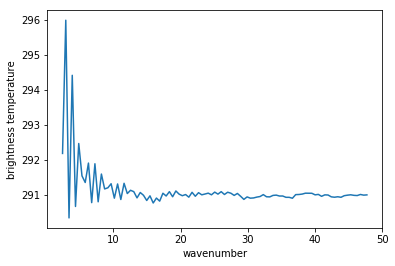

In [5]:
plot_temp_vs_wn(spectrum=1, lower_wn=5, upper_wn=100) 

In [6]:
h = 6.626e-34
c = 299792458
k = 1.381e-23

def planck(wavenumber, T):
    return 2*h*(c**2)*((wavenumber*100)**3)/(np.exp(h*c*(wavenumber*100)/(k*T))-1)

In [20]:
wns_first = np.array(wns_and_temps_first[0][860:4000]) #defining the arrays of wns and temps from results 1
temps_first = np.array(wns_and_temps_first[1][860:4000])
print('first file has avg temp {} C'.format(np.average(temps_first)-273.15))

wns_last = np.array(wns_and_temps_last[0][860:4000]) #defining as above for results 2
temps_last = np.array(wns_and_temps_last[1][860:4000])
print('last file has avg temp {} C'.format(np.average(temps_last)-273.15))

first file has avg temp 21.763222643312133 C
last file has avg temp 60.865138216560524 C


In [8]:
planckvec = np.vectorize(planck)
rad_first = planckvec(wns_first, temps_first) #radiances of first dataset
rad_last = planckvec(wns_last, temps_last) #radiances of second dataset

In [29]:
def plot_radiances(temps_X, wns_X, rad_X, ylim_low, ylim_high):
    fig = plt.figure() #plot radiance as function of wavenumber
    plt.figure(figsize=(10,8))

    plt.subplot(2,1,1)
    plt.xlabel('wavenumbers')
    plt.ylabel(r'Radiance $W m^{-2} sr^{-1} (cm^{-1})^{-1}$')
    plt.plot(wns_X, [x*100 for x in rad_X])

    plt.subplot(2,1,2)
    plt.xlabel('temperatures')
    plt.ylabel(r'Radiance $W m^{-2} sr^{-1} (cm^{-1})^{-1}$')
    plt.scatter(temps_X,[x*100 for x in rad_X], s=1)
    plt.ylim(ylim_low, ylim_high)

    plt.subplots_adjust(hspace=0.2)
    plt.show()

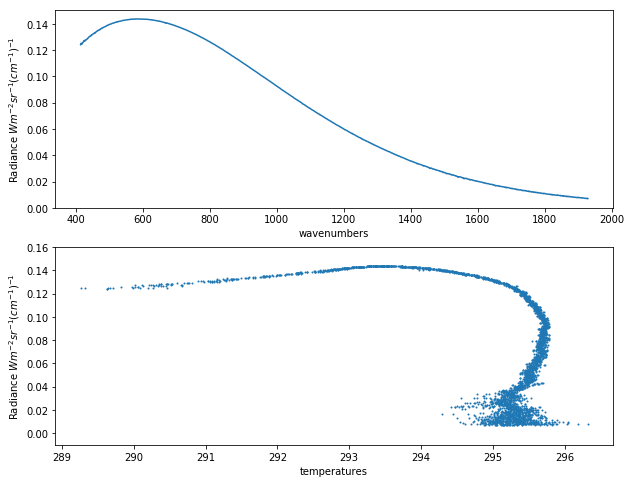

In [30]:
plot_radiances(temps_first, wns_first, rad_first, -0.01,0.16)

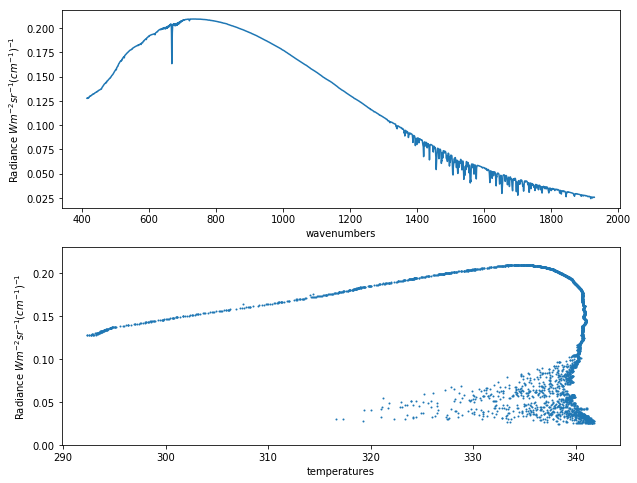

In [31]:
plot_radiances(temps_last, wns_last, rad_last, 0.,0.23)

In [12]:
def plot_planck_X(temps_X, wns_X, rad_X):
    radiances = []
    avg_temp = np.average(temps_X)
    
    for w in wns_X:
        radiances.append(planck(w, avg_temp))
    
    plt.figure(figsize=(10,5))    
    plt.plot(wns_X, [x*100 for x in radiances])
    plt.plot(wns_X, [x*100 for x in rad_X])
    plt.xlabel(r'Wavenumber $cm^{-1}$')
    plt.ylabel(r'Radiance $W m^{-2} sr^{-1} (cm^{-1})^{-1}$')
    plt.legend(['theoretical radiance', 'experimental radiance'])
    plt.show()

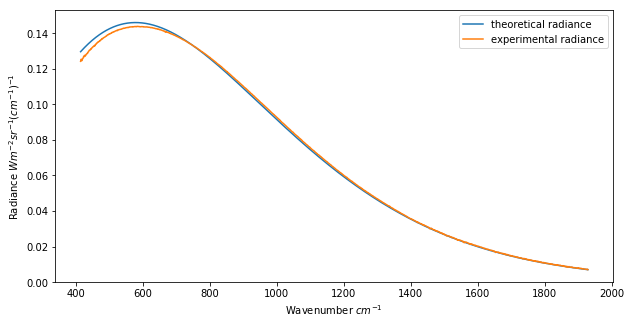

In [13]:
plot_planck_X(temps_first, wns_first, rad_first)

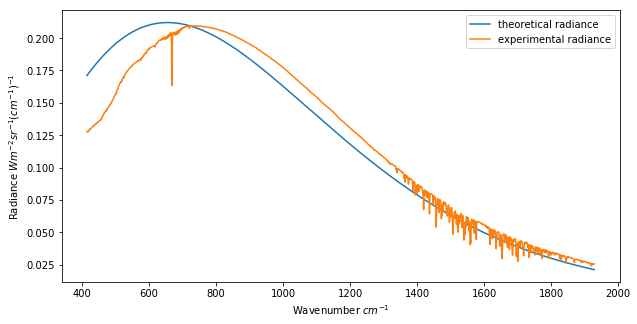

In [14]:
plot_planck_X(temps_last, wns_last, rad_last)

In [15]:
def transmission_fn(temp, rad_X, wns_X):
    real_radiances = rad_X
    theory_radiances = []

    for w in wns_X:
        theory_radiances.append(planck(w,temp))
    
    def division(real_val,theory_val):
        return real_val/theory_val
    
    division_vec = np.vectorize(division)
    
    ratio = division_vec(real_radiances, theory_radiances)
    plt.figure(figsize=(8,5))    
    plt.plot(wns_X, ratio)
    plt.xlabel('wavenumber')
    plt.ylabel('transmission')
    plt.show()

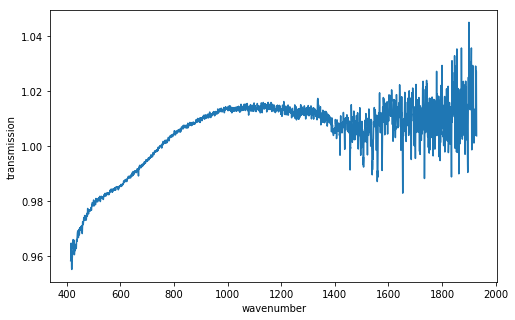

In [16]:
transmission_fn(np.average(temps_first), rad_first, wns_first)

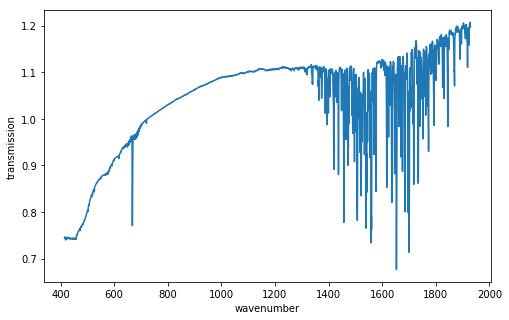

In [17]:
transmission_fn(np.average(temps_last), rad_last, wns_last)